# Reading a Pin

In this notebook we read from a pin that is deployed Posit Connect.  The pin consists of historical soybean yields.

You can learn more about the **pins** package here: https://rstudio.github.io/pins-python/intro.html

## Importing Packages

Let's begin by importing the packages that we will need.

In [1]:
import pandas as pd
import pins
import os
import dotenv # this is the python-dotenv package

## Environment Variables

In order to communicate with our Posit Connect server we will need the URL of the server and an API key.  These have been stored as environment variables in a `.env` file in the local directory.

In [2]:
dotenv.load_dotenv(override=True)
rsc_server = os.environ['CONNECT_SERVER']
rsc_key = os.environ['CONNECT_API_KEY']

## Creating a Board

The next step in creating a pin is creating a board, which is essentially a connection to the Connect server.

In [3]:
board = pins.board_connect(server_url=rsc_server, api_key=rsc_key)
board

## Reading the Pin

We can now read the pin using the `board.pins_read()` method. 

In [6]:
df = board.pin_read('pritam.dalal/soybean_yields_python')
df

,entity,year,product,crop_yield
0,africa,1961,soybeans,0.3758
1,africa,1962,soybeans,0.3935
2,africa,1963,soybeans,0.3949
3,africa,1964,soybeans,0.3692
4,africa,1965,soybeans,0.3480
...,...,...,...,...
5956,zimbabwe,2014,soybeans,1.1767
5957,zimbabwe,2015,soybeans,0.9459
5958,zimbabwe,2016,soybeans,1.1958
5959,zimbabwe,2017,soybeans,1.5139


## Visualizing USA Soybean Yields

Finally, let's visualize the historical soybean yields for the United States.

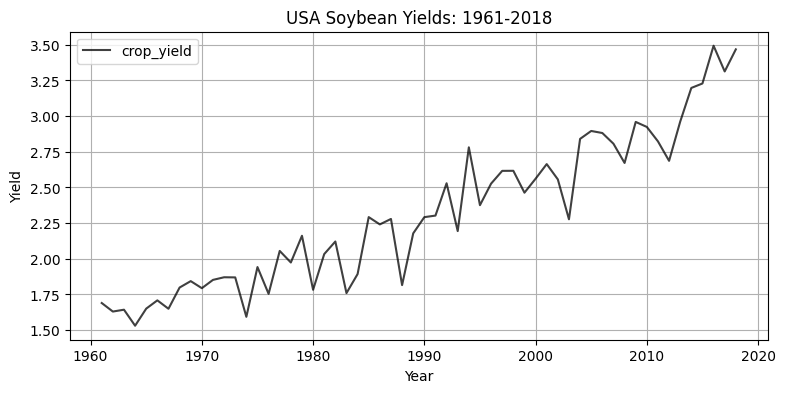

In [10]:
ax = df.query('entity == "united states"').\
        plot(
            x = 'year',
            y = 'crop_yield',
            title = 'USA Soybean Yields: 1961-2018',
            grid = True,
            style = 'k',
            alpha = 0.75,
            figsize = (9, 4),
        );
ax.set_xlabel('Year');
ax.set_ylabel('Yield');